In [48]:
import numpy as np
import pandas as pd
# from pandas_datareader import data, wb
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime as dt

In [49]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2025, 1, 1)

In [50]:
df = yf.download("NVDA", "2020-01-01", "2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [51]:
df

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600


In [52]:
import plotly
import cufflinks as cf
from plotly.offline import init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

import plotly.graph_objs as go

In [53]:
df["Close"].head()

Ticker,NVDA
Date,
2020-01-02,5.972711
2020-01-03,5.877111
2020-01-06,5.901758
2020-01-07,5.973208
2020-01-08,5.984412


<Axes: xlabel='Date'>

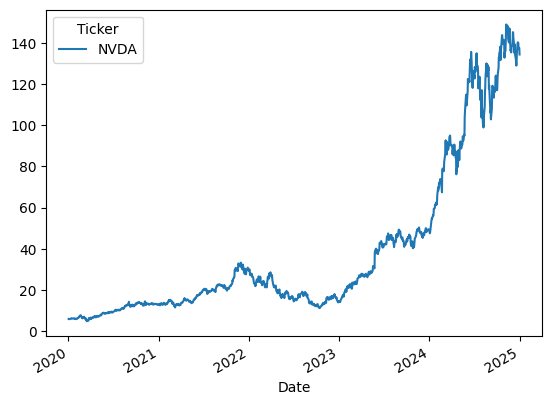

In [54]:
df["Close"].plot()

In [55]:
close = df["Close"]
close

Ticker,NVDA
Date,
2020-01-02,5.972711
2020-01-03,5.877111
2020-01-06,5.901758
2020-01-07,5.973208
2020-01-08,5.984412
...,...
2024-12-24,140.220001
2024-12-26,139.929993
2024-12-27,137.009995


In [56]:
pct = close.pct_change()
pct

Ticker,NVDA
Date,
2020-01-02,NaN
2020-01-03,-0.016006
2020-01-06,0.004194
2020-01-07,0.012107
2020-01-08,0.001876
...,...
2024-12-24,0.003938
2024-12-26,-0.002068
2024-12-27,-0.020868


In [57]:
pct.std()

Ticker
NVDA    0.03394
dtype: float64

In [58]:
np.std(pct)

/opt/anaconda3/envs/geese/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning:

The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



Ticker
NVDA    0.033927
dtype: float64

In [59]:
df

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600


In [60]:
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [61]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df

,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
Date,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600
2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600


In [62]:
df = df.rename(columns={
    'Close_NVDA': 'Close',
    'High_NVDA': 'High',
    'Low_NVDA': 'Low',
    'Open_NVDA': 'Open',
    'Volume_NVDA': 'Volume'
})
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600
2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600


In [63]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [64]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600
2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600


In [65]:
# Flatten the MultiIndex columns


# Rename columns for simplicity


# Ensure index is datetime


# Create the candlestick chart
fig = go.Figure(
    data=[
        go.Candlestick(
            x=df.index,  # Dates from the index
            open=df['Open'],  # Open prices
            high=df['High'],  # High prices
            low=df['Low'],    # Low prices
            close=df['Close'] # Close prices
        )
    ]
)

# Update layout
fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

# Show the plot
fig.show()

: 